## NNDL_Proj 1 [NNDL_R6_Project1.ipynb]
  Read the dataset

1.   Read the dataset
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into Train and test sets
5. Normalize the train and test data (2.5 points)
6. Initialize & build the model (7.5 points)
7. Optimize the model (5 points)
9. Predict the results using 0.5 as a threshold (5 points)
10.Print the Accuracy score and confusion matrix (5 points)

In [0]:
%tensorflow_version 2.x

In [207]:
import tensorflow as tf
import warnings 
warnings.filterwarnings('ignore')
# tf.random.set_seed(42)
tf.__version__      

'2.0.0'

In [208]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
churn_df = pd.read_csv('gdrive/My Drive/Churn.csv')

In [210]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [211]:
churn_df.drop(['Surname', 'RowNumber', 'CustomerId'],  inplace = True, axis=1 )
churn_df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [0]:
churn_df = pd.get_dummies(churn_df)

In [213]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [214]:
print("\033[94m\033[1m1. Dimension of Bank-dataset :\x1b[0m",list(churn_df.shape )[0] ,
      " Rows &",list(churn_df.shape )[1] ," Columns")
print("\033[94m\033[1m2. Column Names:\x1b[0m")
for i,col in enumerate(churn_df.columns.tolist(),start=1):
    print (" {}.{} ".format(i,col))
print("\033[94m\033[1m3. There is/are \x1b[0m", sum(churn_df.isnull().values.ravel()),
       "\033[94m\033[1mmissing value(s) in the data set.\x1b[0m")
print( churn_df.isnull().sum())     
print("\033[94m\033[1m4. Data Info:\x1b[0m")
print("-"*50)
print(churn_df.info())

1. Dimension of Bank-dataset : 10000  Rows & 14  Columns
2. Column Names:
 1.CreditScore 
 2.Age 
 3.Tenure 
 4.Balance 
 5.NumOfProducts 
 6.HasCrCard 
 7.IsActiveMember 
 8.EstimatedSalary 
 9.Exited 
 10.Geography_France 
 11.Geography_Germany 
 12.Geography_Spain 
 13.Gender_Female 
 14.Gender_Male 
3. There is/are  0 missing value(s) in the data set.
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64
4. Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance 

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


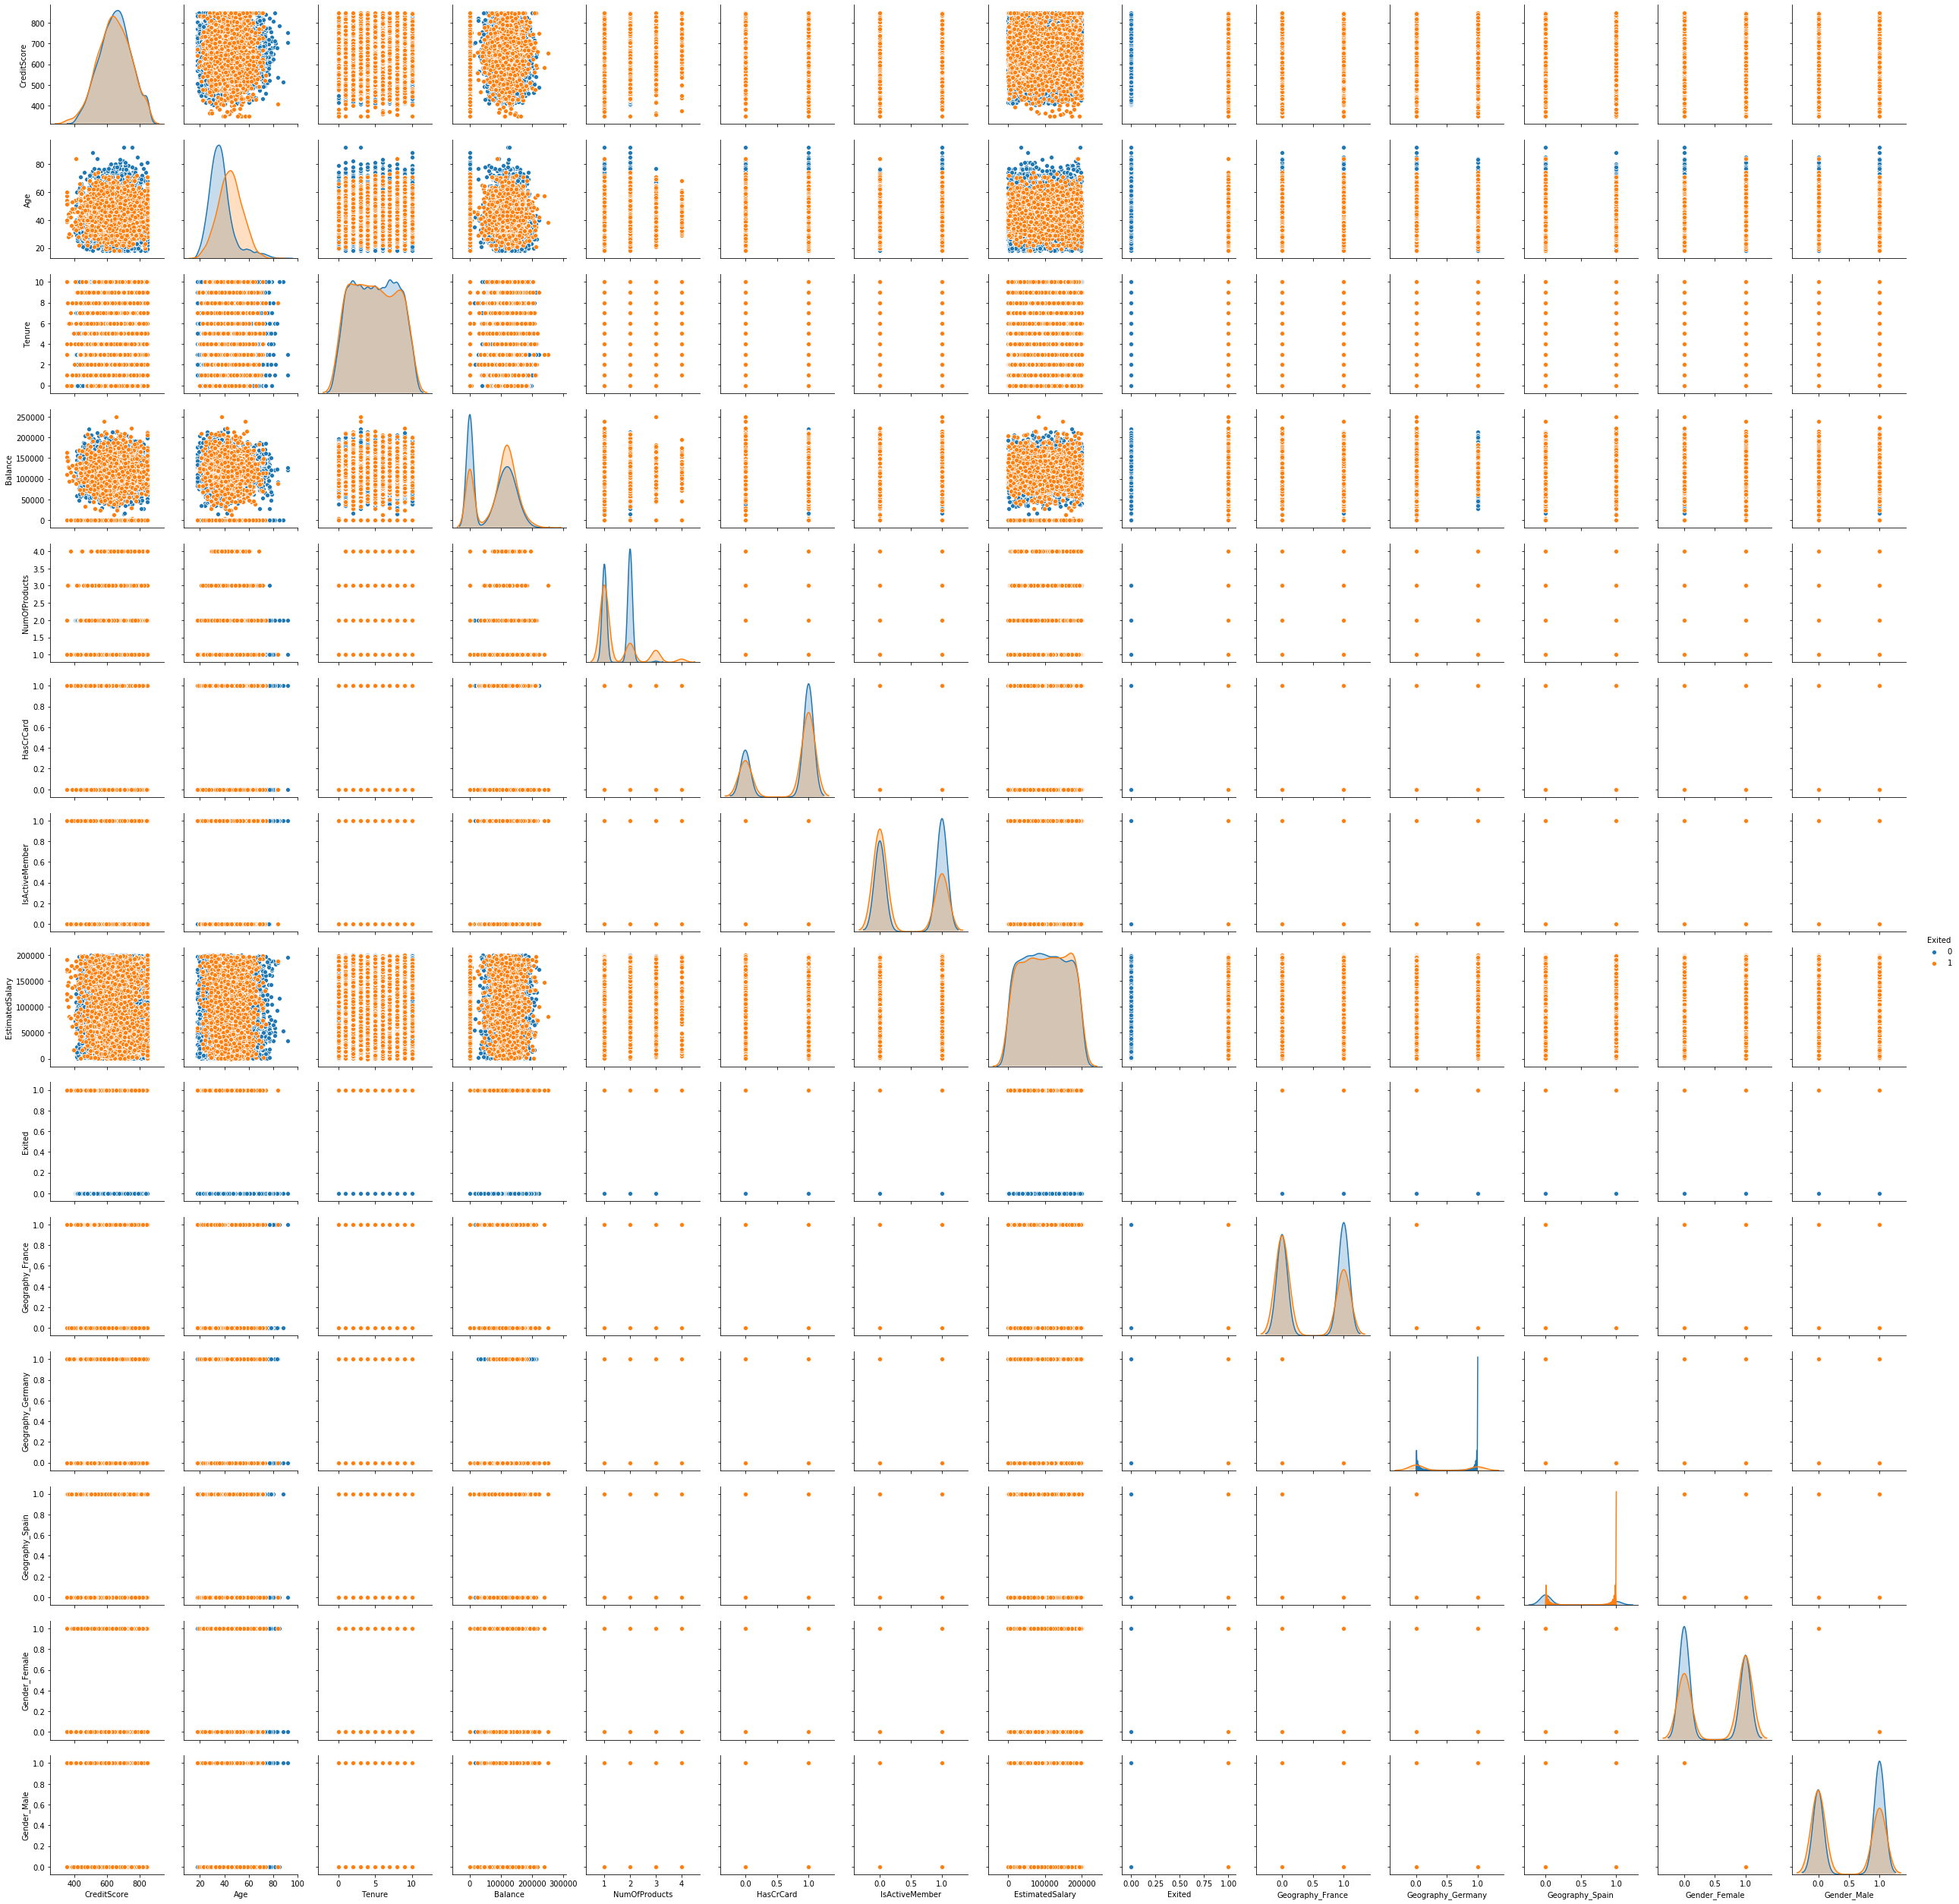

In [0]:
import seaborn as sns
sns.pairplot(churn_df, diag_kind='kde', hue = 'Exited')

In [0]:
features = churn_df.drop(['Exited'],axis = 1 )
target = churn_df['Exited']

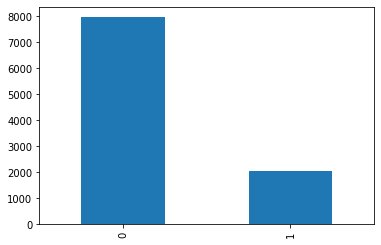

In [216]:
target.value_counts().plot.bar()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 1)

In [218]:
for i,col in enumerate(X_train.columns.tolist(),start=0):
    print (" {}.{} ".format(i,col))

 0.CreditScore 
 1.Age 
 2.Tenure 
 3.Balance 
 4.NumOfProducts 
 5.HasCrCard 
 6.IsActiveMember 
 7.EstimatedSalary 
 8.Geography_France 
 9.Geography_Germany 
 10.Geography_Spain 
 11.Gender_Female 
 12.Gender_Male 


In [0]:
cols_tobe_normalized = X_train.iloc[:,[0,1,2,3,4,7]].columns.tolist()
X_train[cols_tobe_normalized] = X_train[cols_tobe_normalized].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_test[cols_tobe_normalized] = X_test[cols_tobe_normalized].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [221]:
X_train.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2228,0.588,0.256757,0.8,0.0,0.333333,1,0,0.104449,1,0,0,1,0


In [220]:
X_test.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9953,0.4,0.391892,0.2,0.0,0.333333,1,1,0.485275,1,0,0,0,1


In [222]:
print(X_train.shape)

(7000, 13)


In [223]:
y_train.shape

(7000,)

In [224]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(13, input_dim=13, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [225]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          # epochs=100,
          # batch_size=trainX.shape[0])
          epochs=300,
          # batch_size=32
          )

Train on 7000 samples, validate on 3000 samples
Epoch 1/300
7000/7000 [==============================] - 1s 73us/sample - loss: 0.5947 - accuracy: 0.6810 - val_loss: 0.4969 - val_accuracy: 0.7910
Epoch 2/300
7000/7000 [==============================] - 0s 58us/sample - loss: 0.4789 - accuracy: 0.7993 - val_loss: 0.4808 - val_accuracy: 0.7930
Epoch 3/300
7000/7000 [==============================] - 0s 55us/sample - loss: 0.4639 - accuracy: 0.8029 - val_loss: 0.4704 - val_accuracy: 0.7950
Epoch 4/300
7000/7000 [==============================] - 0s 57us/sample - loss: 0.4554 - accuracy: 0.8060 - val_loss: 0.4633 - val_accuracy: 0.7990
Epoch 5/300
7000/7000 [==============================] - 0s 59us/sample - loss: 0.4499 - accuracy: 0.8103 - val_loss: 0.4573 - val_accuracy: 0.8030
Epoch 6/300
7000/7000 [==============================] - 0s 59us/sample - loss: 0.4451 - accuracy: 0.8106 - val_loss: 0.4531 - val_accuracy: 0.8053
Epoch 7/300
7000/7000 [==============================] - 0s 58us

In [226]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 14        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [227]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          # epochs=100,
          # batch_size=trainX.shape[0])
          epochs=300,
          # batch_size=32
          )

Train on 7000 samples, validate on 3000 samples
Epoch 1/300
7000/7000 [==============================] - 1s 72us/sample - loss: 0.3329 - accuracy: 0.8621 - val_loss: 0.3458 - val_accuracy: 0.8630
Epoch 2/300
7000/7000 [==============================] - 0s 56us/sample - loss: 0.3319 - accuracy: 0.8629 - val_loss: 0.3444 - val_accuracy: 0.8580
Epoch 3/300
7000/7000 [==============================] - 0s 54us/sample - loss: 0.3332 - accuracy: 0.8620 - val_loss: 0.3443 - val_accuracy: 0.8640
Epoch 4/300
7000/7000 [==============================] - 0s 59us/sample - loss: 0.3328 - accuracy: 0.8609 - val_loss: 0.3457 - val_accuracy: 0.8643
Epoch 5/300
7000/7000 [==============================] - 0s 57us/sample - loss: 0.3327 - accuracy: 0.8627 - val_loss: 0.3457 - val_accuracy: 0.8630
Epoch 6/300
7000/7000 [==============================] - 0s 70us/sample - loss: 0.3322 - accuracy: 0.8614 - val_loss: 0.3445 - val_accuracy: 0.8610
Epoch 7/300
7000/7000 [==============================] - 0s 66us

In [0]:
val_predicts = model.predict(X_test, verbose=0)
y_pred = [1 * (x[0]>=0.5) for x in val_predicts]
# y_pred = model.predict_classes(X_test, verbose=0)

In [263]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Test Accuracy:",round(accuracy_score(y_test, y_pred),4))
print("Confusion Matrix:")
print(confusion_matrix( y_pred, y_test))
print("Classification Report:")
print(classification_report( y_pred, y_test))

Test Accuracy: 0.8623
Confusion Matrix:
[[2288  328]
 [  85  299]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      2616
           1       0.48      0.78      0.59       384

    accuracy                           0.86      3000
   macro avg       0.72      0.83      0.75      3000
weighted avg       0.90      0.86      0.88      3000

